# Matching is as Easy as Matrix Inversion (1987)
#  Mulmaney, Vazirani, Vazirani

Paper Link: [https://doi.org/10.1007/BF02579206](https://doi.org/10.1007/BF02579206)


**Summary:**

This paper presents a linear algebra-based method for finding Perfect Matching and Maximum Matchings in bipartite and general graphs in parallel.

In [1]:
import scipy

In [2]:
from networkx.algorithms import bipartite
import networkx as nx
#random_graph(n, m, p[, seed, directed])
n = 20
m = 20
p = 0.6
seed = 1
directed = False
G = bipartite.random_graph(n, m, p, seed, directed)
reference_matching = nx.max_weight_matching(G, maxcardinality=True)
assert (len(reference_matching)==n)
import scipy.sparse as sps
# Convert the graph to a SciPy sparse matrix
mat = nx.to_scipy_sparse_array(G,format="lil")
#mat.setdiag(1)
print(mat.shape)

(40, 40)


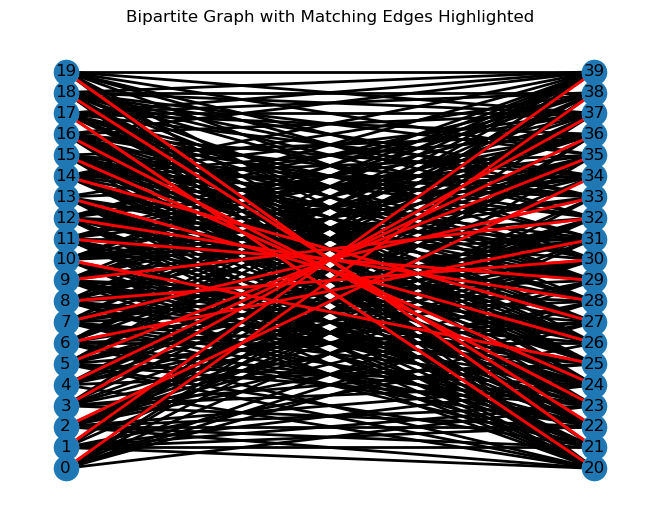

In [3]:
# Draw the graph with the perfect matching edges highlighted
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Get the nodes in each partition
partition1_nodes, partition2_nodes = bipartite.sets(G)
# Use bipartite_layout for bipartite graph visualization
pos = nx.bipartite_layout(G, partition1_nodes)

# Find the maximum cardinality matching
matching = nx.max_weight_matching(G, maxcardinality=True)

# Create a new graph with only the matching edges
matching_edges = [(u, v) for u, v in G.edges() if (u, v) in matching or (v, u) in matching]
matching_graph = nx.Graph()
matching_graph.add_edges_from(matching_edges)

# Create a list of edge colors, red for edges in the matching and black for others
edge_colors = ['r' if (u, v) in matching_edges or (v, u) in matching_edges else 'k' for u, v in G.edges()]

# Draw the bipartite graph with matching edges highlighted in red
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=edge_colors, width=2.0)
nx.draw(matching_graph, pos, with_labels=False, edge_color='r', width=2.0)

plt.title("Bipartite Graph with Matching Edges Highlighted")
plt.show()


$\textbf{DEFINITION.}$ Given a graph $G(V, E)$, let $D$ be its adjacency matrix, i.e.,

$d_{ij}= \begin{cases}
0, & \text{if } (u_i, u_j) \in E, \\
1, & \text{otherwise.}
\end{cases}$

Replace the 1's in this matrix by indeterminates in the following manner: if
$d_{ij} = d_{ji} = 1$, then replace these two entries by a unique indeterminate, say
$x_{ij}$, and its negative, i.e., $-x_{ij}$, so that the entries above the diagonal get a
positive sign. The resulting matrix, $A$, is called the Tutte matrix of $G$.

In [4]:
from scipy.sparse import triu, tril
# Set diagonal to 1 so matrix is invertible
# Extract upper triangle of symmetric sparse matrix
upper_triangle = triu(mat,format="csc", k=1)
lower_triangle = tril(mat,format="csc")
tutte=lower_triangle+(upper_triangle)
print(tutte.shape)

(40, 40)


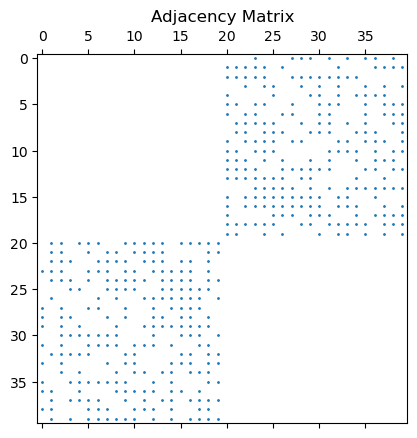

In [5]:
import numpy as np
import scipy as sp
import scipy.sparse
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.spy(tutte, aspect='equal', marker='.', markersize=2)
plt.title("Adjacency Matrix")
plt.show()

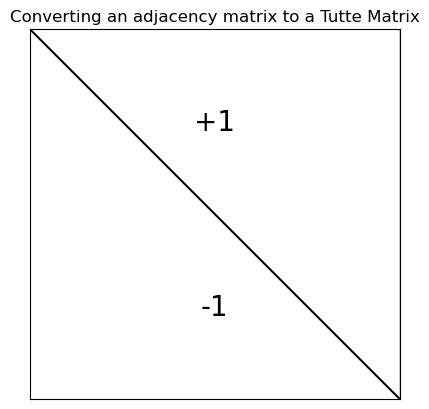

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_TutteTeachingTool():
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create a square
    square = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='b', facecolor='none')
    ax.add_patch(square)

    # Draw a line from the top-left corner to the bottom-right corner
    ax.plot([0, 1], [1, 0], 'k')

    # Add a big -1 to the top-right triangle
    triangle_vertices = np.array([[0, 1], [1, 1], [0, 0]])
    triangle = plt.Polygon(triangle_vertices, closed=True, fill=True, facecolor='w', edgecolor='none')
    ax.add_patch(triangle)
    ax.text(0.5, 0.75, '+1', fontsize=20, ha='center', va='center')

    # Add a big +1 to the bottom-left triangle
    triangle_vertices = np.array([[0, 1], [1, 0], [0, 0]])
    triangle = plt.Polygon(triangle_vertices, closed=True, fill=True, facecolor='w', edgecolor='none')
    ax.add_patch(triangle)
    ax.text(0.5, 0.25, '-1', fontsize=20, ha='center', va='center')

    # Set axis limits and aspect ratio
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')

    # Remove axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title("Converting an adjacency matrix to a Tutte Matrix")
    # Show the plot
    plt.show()

# Call the method to create the plot
plot_TutteTeachingTool()


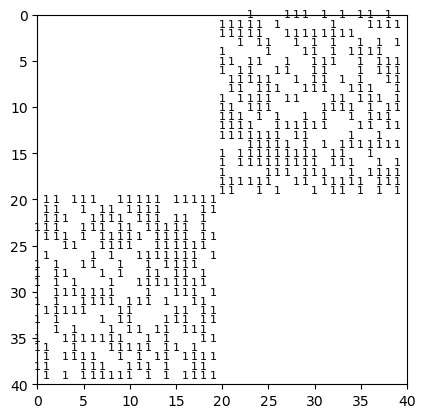

In [7]:
import numpy as np
import scipy as sp
import scipy.sparse
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt

def plot_randomized_adjacency_matrix(mat):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Get the non-zero elements and their positions
    non_zero_elements = mat.data
    row_indices, col_indices = mat.nonzero()

    # Plot numbers as markers with annotations
    for i in range(len(non_zero_elements)):
        ax.annotate(str(non_zero_elements[i]), (col_indices[i], row_indices[i]), color='black', fontsize=8, ha='center', va='center')

    # Set axis limits and aspect ratio
    ax.set_xlim(0, mat.shape[1])
    ax.set_ylim(0, mat.shape[0])
    ax.set_aspect('equal')

    # Invert the y-axis to have (0, 0) at the top left
    ax.invert_yaxis()

    # Show the plot
    plt.show()

# Call the method to create the plot
plot_randomized_adjacency_matrix(tutte)


$\textbf{THEOREM (Tutte)}$: Let $G$ be a graph, and let $A$ be its Tutte matrix. Then, if $\det(A) \neq 0$, there exists a perfect matching in $G$.

Aside: Tutte matrices are often singular, thus non-invertible.

Lovász [Lo] proposed the use of randomization for getting around this difficulty: substitute for the variables in $A$ randomly from a polynomially large set of integers; if $A$ was non-singular, the substituted matrix will be non-singular with very high probability.


$\textbf{DEFINITION.}$ Let $G$ be a graph having a perfect matching, $A$ be its Tutte matrix, and $p$ be any prime. A substitution $S$ for the variables in $A$ by elements of $\mathbb{Z}_p$ is a good substitution if $det(A^S) \neq 0 \, (\text{mod } p)$.


Could it happen that all these coefficients are divisible by a prime $p$ so that modulo $p$, the polynomial is the zero polynomial even though $\text{det}(A) \neq 0$ over the integers? In this case, the substituted matrix will be necessarily singular.

Find a prime $p > n^4$. Choose a random substitution $S$: a set of $x'_{ij}$ in $\mathbb{Z}_p$, i.e., independently, each $S(x_{ji})$ is equally likely to be any element of $\mathbb{Z}_p$. Denote by $A^S$ the result of replacing each $x_{ii}$ in $A^S$ by $S(x_{ij}$).

In this theorem, $\mathbb{Z}$ is the symbol for the class of integers.


(40, 40)


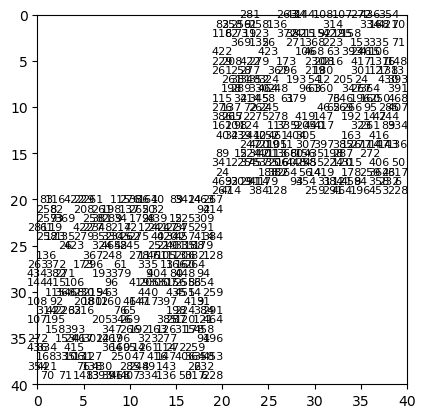

In [8]:
import time
import numpy as np
start_time = time.time()
# Set the data array in place to random integers between 0 and nnz
randomEdgeWeights = np.random.randint(1, 2*lower_triangle.nnz + 1, size=lower_triangle.nnz)
random_lower_triangle=lower_triangle.copy()
random_lower_triangle.data=randomEdgeWeights
random_tutte=random_lower_triangle+(random_lower_triangle.T)
print(random_tutte.shape)
plot_randomized_adjacency_matrix(random_tutte)


In [9]:
#https://gist.github.com/luizfelippesr/5965a536d202b913beda9878a2f8ef3e
import scipy.sparse as spr
import numpy as np

def minimumSwaps(arr): 
    """
    Minimum number of swaps needed to order a
    permutation array
    """
    # from https://www.thepoorcoder.com/hackerrank-minimum-swaps-2-solution/
    a = dict(enumerate(arr))
    b = {v:k for k,v in a.items()}
    count = 0
    for i in a:
        x = a[i]
        if x!=i:
            y = b[i]
            a[y] = x
            b[x] = y
            count+=1

    return count

def spr_slogdet(arr):
    """
    Computes the sign and log of the determinant
    of a sparse matrix
    """
    # Modified version of the solution given by Saullo G. P. Castro
    # in the discussion in https://stackoverflow.com/a/60982033/4862845
    lu = spr.linalg.splu(arr)
    
    diagL = lu.L.diagonal()
    diagU = lu.U.diagonal()

    logdet = np.log(np.abs(diagL)).sum() + np.log(np.abs(diagU)).sum()
    
    sign = np.sign(diagL).prod()*np.sign(diagU).prod()
    sign *= (-1)**(minimumSwaps(lu.perm_r))
    
    return sign, logdet

In [10]:
#https://gist.github.com/luizfelippesr/5965a536d202b913beda9878a2f8ef3e
import scipy.sparse as spr
import numpy as np

def minimumSwaps(arr): 
    """
    Minimum number of swaps needed to order a
    permutation array
    """
    # from https://www.thepoorcoder.com/hackerrank-minimum-swaps-2-solution/
    a = dict(enumerate(arr))
    b = {v:k for k,v in a.items()}
    count = 0
    for i in a:
        x = a[i]
        if x!=i:
            y = b[i]
            a[y] = x
            b[x] = y
            count+=1

    return count

def spr_sintdet(arr):
    """
    Computes the sign and log of the determinant
    of a sparse matrix
    """
    # Modified version of the solution given by Saullo G. P. Castro
    # in the discussion in https://stackoverflow.com/a/60982033/4862845
    lu = spr.linalg.splu(arr)
    
    diagL = lu.L.diagonal()
    diagU = lu.U.diagonal()

    #logdet = np.log(np.abs(diagL)).sum() + np.log(np.abs(diagU)).sum()
    L,U = lu.L, lu.U
    intdet = diagL.prod()*diagU.prod()
    sign = np.sign(diagL).prod()*np.sign(diagU).prod()
    sign *= (-1)**(minimumSwaps(lu.perm_r))
    
    return sign, intdet

In [11]:
import numpy as np
import scipy.linalg
from sympy import symbols, Matrix, det, simplify

def calculate_matrix_determinant(M):
    # Create a symbolic matrix
    n, m = M.shape
    symbol_matrix = Matrix(n, m, lambda i, j: symbols('a{}_{}'.format(i, j)))

    # Assign values from the input matrix to the symbolic matrix
    for i in range(n):
        for j in range(m):
            symbol_matrix[i, j] = M[i, j]

    # Calculate the determinant symbolically
    determinant_symbolic = symbol_matrix.det()

    # Simplify the symbolic expression
    simplified_determinant = simplify(determinant_symbolic)
    return simplified_determinant

In [12]:
import numpy as np
import scipy.linalg
from sympy import symbols, Matrix, det, simplify

def calculate_matrix_determinant_exp2(M):
    # Create a symbolic matrix
    n, m = M.shape
    symbol_matrix = Matrix(n, m, lambda i, j: symbols('a{}_{}'.format(i, j)))

    # Assign values from the input matrix to the symbolic matrix
    for i in range(n):
        for j in range(m):
            symbol_matrix[i, j] = M[i, j]
    exponentiated_matrix = symbol_matrix**2
    # Calculate the determinant symbolically
    determinant_symbolic = exponentiated_matrix.det()

    # Simplify the symbolic expression
    simplified_determinant = simplify(determinant_symbolic)
    return simplified_determinant

In [13]:
import numpy as np
import scipy.linalg
from sympy import symbols, Matrix, det, simplify

def calculate_matrix_adjoint_exp2(M):
    # Create a symbolic matrix
    n, m = M.shape
    symbol_matrix = Matrix(n, m, lambda i, j: symbols('a{}_{}'.format(i, j)))

    # Assign values from the input matrix to the symbolic matrix
    for i in range(n):
        for j in range(m):
            symbol_matrix[i, j] = M[i, j]
    exponentiated_matrix = symbol_matrix**2
    # Calculate the determinant symbolically
    determinant_symbolic = exponentiated_matrix.det()
    inverse_symbolic = exponentiated_matrix.inv()

    # Simplify the symbolic expression
    simplified_determinant = simplify(determinant_symbolic)
    return inverse_symbolic*simplified_determinant

In [14]:
def matrix_cofactor(matrix):
    start_time = time.time()
    invMat = sps.linalg.inv(matrix)
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Inverted Matrix in {elapsed_time} seconds")
    
    start_time = time.time()
    sign, det = spr_slogdet(mat) 
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Determinant in {elapsed_time} seconds")
    
    return invMat.T * det
    
def matrix_adjoint(matrix):
    start_time = time.time()
    invMat = sps.linalg.inv(matrix)
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Inverted Matrix in {elapsed_time} seconds")
    
    start_time = time.time()
    sign, det = spr_slogdet(mat) 
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Determinant in {elapsed_time} seconds")
    
    return invMat * det

In [15]:
def is_odd(number):
    if number % 2 != 0:
        return True
    else:
        return False

In [16]:
import sympy as sp

def largest_power_of_two(x):
    if x <= 0:
        return 0
    return sp.ceiling(sp.log(x, 2)) - 1


In [17]:
import re

def mod_two(x):
    num2 = int(re.sub(r'(.).*', '\\1', str(x)))
    return num2%2

In [18]:
from sympy import symbols, Eq, solve, log

def extract_real_W_from_highest_power_of_2(x):
    # Find the highest power of 2 that divides x using logarithms
    highest_power = int(log(x, 2))

    # Define the variables
    W = symbols('W')

    # Create the equation
    equation = Eq(2**(2*W), 2**highest_power)

    # Solve for W
    W_solutions = solve(equation, W)

    # Filter out real solutions
    real_W_solutions = [sol for sol in W_solutions if sol.is_real]

    return real_W_solutions

In [19]:
from sympy import symbols, Eq, solve, log

def extract_highest_power_of_2(x):
    # Find the highest power of 2 that divides x using logarithms
    highest_power = int(log(x, 2))

    return highest_power

In [20]:
print(extract_highest_power_of_2(16))

4


In [ ]:
import time
from tqdm import tqdm
import numpy as np
import sympy

matching = []
start_time = time.time()
detB = calculate_matrix_determinant_exp2(random_tutte.toarray())
stop_time = time.time()
elapsed_time = stop_time - start_time
print(f"Determinant in {elapsed_time} seconds")
print(detB)
print("w =", extract_highest_power_of_2(detB))
w = extract_highest_power_of_2(detB)
Aij_coo = random_tutte.tocoo()
Aij_dense = random_tutte.toarray()

# Initialize the progress bar with position=0
progress_bar = tqdm(total=len(Aij_coo.row)//2, desc="Processing", position=0)

# Get the number of rows
num_rows = random_tutte.shape[0]

row_set = set()
col_set = set()


for (row1, col1, value1) in zip(Aij_coo.row, Aij_coo.col, Aij_coo.data):
    if row1 > col1:  # Only process lower triangular elements
        start_time = time.time()
        newAdj = Aij_dense.copy()
        rows_to_exclude = [row1, col1]
        cols_to_exclude = [col1, row1]
        rows_to_exclude = [row1]
        cols_to_exclude = [col1]
        rows_to_keep = np.ones(newAdj.shape[0], dtype=bool)
        cols_to_keep = np.ones(newAdj.shape[1], dtype=bool)
        rows_to_keep[rows_to_exclude] = False
        cols_to_keep[cols_to_exclude] = False
        newAdj = newAdj[rows_to_keep][:, cols_to_keep]
        detBij = calculate_matrix_determinant_exp2(newAdj)
        stop_time = time.time()
        elapsed_time = stop_time - start_time

        # Use SymPy to handle large integers
        detBij_sym = sympy.Integer(detBij)
        value1_sym = sympy.Integer(value1)
        w_sym = sympy.Integer(w)
        final = (detBij_sym * (2 ** value1_sym)) / (2 ** w_sym)

        #two_to_the_two_a = largest_power_of_two(detBij)/2
        a=extract_highest_power_of_2(detBij)
        a_sym = sympy.Integer(a)
        print("2**a+2**wij==2**w")
        print(2**a_sym+2**value1_sym==2**w_sym)
        if mod_two(final): # and row1 not in row_set and col1 not in col_set:
            print(f"adding {(row1, col1)} to the matching")
            matching.append((row1, col1))
            row_set.add(row1)
            col_set.add(col1)
        #print("Bij =", detBij_sym)
        #print("2^wij =", 2 ** value1_sym)
        #print("2^w =", (2 ** w_sym))
        #print("Bij*2^wij/2^w =", final)
        #print("(Bij*2^wij/2^w) mod 2 =", mod_two(final))

        progress_bar.update(1)  # Update the progress bar

progress_bar.close()


Determinant in 0.28296780586242676 seconds
204042978133814051117025540953422803686553719855997459313535188534178310447126117673627053064910984543071904217449678241272916889203090403990103667968076788690162064927795871358087505467114017567579402134120960000
w = 705


Processing:   0%|▌                                                                                                                                           | 1/239 [00:00<02:05,  1.90it/s]

2**a+2**wij==2**w
False
adding (23, 0) to the matching


Processing:   1%|█▏                                                                                                                                          | 2/239 [00:01<02:27,  1.61it/s]

2**a+2**wij==2**w
False


Processing:   1%|█▊                                                                                                                                          | 3/239 [00:01<02:38,  1.49it/s]

2**a+2**wij==2**w
False


Processing:   2%|██▎                                                                                                                                         | 4/239 [00:02<02:16,  1.72it/s]

2**a+2**wij==2**w
False
adding (29, 0) to the matching


Processing:   2%|██▉                                                                                                                                         | 5/239 [00:03<02:39,  1.47it/s]

2**a+2**wij==2**w
False
adding (31, 0) to the matching


Processing:   3%|███▌                                                                                                                                        | 6/239 [00:03<02:29,  1.56it/s]

2**a+2**wij==2**w
False
adding (33, 0) to the matching


Processing:   3%|████                                                                                                                                        | 7/239 [00:04<02:19,  1.66it/s]

2**a+2**wij==2**w
False
adding (35, 0) to the matching


Processing:   3%|████▋                                                                                                                                       | 8/239 [00:04<02:08,  1.79it/s]

2**a+2**wij==2**w
False


Processing:   4%|█████▎                                                                                                                                      | 9/239 [00:05<02:08,  1.79it/s]

2**a+2**wij==2**w
False


Processing:   4%|█████▊                                                                                                                                     | 10/239 [00:05<02:03,  1.86it/s]

2**a+2**wij==2**w
False
adding (20, 1) to the matching


Processing:   5%|██████▍                                                                                                                                    | 11/239 [00:06<02:00,  1.90it/s]

2**a+2**wij==2**w
False
adding (21, 1) to the matching


Processing:   5%|██████▉                                                                                                                                    | 12/239 [00:06<01:55,  1.97it/s]

2**a+2**wij==2**w
False
adding (22, 1) to the matching


Processing:   5%|███████▌                                                                                                                                   | 13/239 [00:07<02:17,  1.65it/s]

2**a+2**wij==2**w
False
adding (23, 1) to the matching


Processing:   6%|████████▏                                                                                                                                  | 14/239 [00:08<02:09,  1.74it/s]

2**a+2**wij==2**w
False
adding (24, 1) to the matching


Processing:   6%|████████▋                                                                                                                                  | 15/239 [00:08<02:14,  1.67it/s]

2**a+2**wij==2**w
False
adding (26, 1) to the matching


Processing:   7%|█████████▎                                                                                                                                 | 16/239 [00:09<02:21,  1.58it/s]

2**a+2**wij==2**w
False
adding (32, 1) to the matching


Processing:   7%|█████████▉                                                                                                                                 | 17/239 [00:10<02:21,  1.56it/s]

2**a+2**wij==2**w
False
adding (36, 1) to the matching


Processing:   8%|██████████▍                                                                                                                                | 18/239 [00:10<02:14,  1.65it/s]

2**a+2**wij==2**w
False
adding (37, 1) to the matching


Processing:   8%|███████████                                                                                                                                | 19/239 [00:11<02:20,  1.57it/s]

2**a+2**wij==2**w
False
adding (38, 1) to the matching


Processing:   8%|███████████▋                                                                                                                               | 20/239 [00:11<02:15,  1.62it/s]

2**a+2**wij==2**w
False
adding (39, 1) to the matching


Processing:   9%|████████████▏                                                                                                                              | 21/239 [00:12<02:17,  1.59it/s]

2**a+2**wij==2**w
False
adding (20, 2) to the matching


Processing:   9%|████████████▊                                                                                                                              | 22/239 [00:13<02:04,  1.74it/s]

2**a+2**wij==2**w
False


Processing:  10%|█████████████▍                                                                                                                             | 23/239 [00:13<02:09,  1.67it/s]

2**a+2**wij==2**w
False


Processing:  10%|█████████████▉                                                                                                                             | 24/239 [00:14<01:59,  1.80it/s]

2**a+2**wij==2**w
False


Processing:  10%|██████████████▌                                                                                                                            | 25/239 [00:14<02:08,  1.66it/s]

2**a+2**wij==2**w
False
adding (24, 2) to the matching


Processing:  11%|███████████████                                                                                                                            | 26/239 [00:15<02:09,  1.65it/s]

2**a+2**wij==2**w
False


Processing:  11%|███████████████▋                                                                                                                           | 27/239 [00:16<02:12,  1.60it/s]

2**a+2**wij==2**w
False


Processing:  12%|████████████████▎                                                                                                                          | 28/239 [00:16<02:13,  1.58it/s]

2**a+2**wij==2**w
False
adding (29, 2) to the matching


Processing:  12%|████████████████▊                                                                                                                          | 29/239 [00:17<02:17,  1.53it/s]

2**a+2**wij==2**w
False


Processing:  13%|█████████████████▍                                                                                                                         | 30/239 [00:18<02:14,  1.55it/s]

2**a+2**wij==2**w
False


Processing:  13%|██████████████████                                                                                                                         | 31/239 [00:18<02:13,  1.56it/s]

2**a+2**wij==2**w
False


Processing:  13%|██████████████████▌                                                                                                                        | 32/239 [00:19<02:00,  1.72it/s]

2**a+2**wij==2**w
False
adding (33, 2) to the matching


Processing:  14%|███████████████████▏                                                                                                                       | 33/239 [00:19<01:56,  1.76it/s]

2**a+2**wij==2**w
False
adding (34, 2) to the matching


Processing:  14%|███████████████████▊                                                                                                                       | 34/239 [00:20<01:50,  1.85it/s]

2**a+2**wij==2**w
False
adding (22, 3) to the matching


Processing:  15%|████████████████████▎                                                                                                                      | 35/239 [00:20<01:49,  1.85it/s]

2**a+2**wij==2**w
False


Processing:  15%|████████████████████▉                                                                                                                      | 36/239 [00:21<01:54,  1.78it/s]

2**a+2**wij==2**w
False
adding (25, 3) to the matching


Processing:  15%|█████████████████████▌                                                                                                                     | 37/239 [00:21<01:50,  1.83it/s]

2**a+2**wij==2**w
False
adding (28, 3) to the matching


Processing:  16%|██████████████████████                                                                                                                     | 38/239 [00:22<01:45,  1.90it/s]

2**a+2**wij==2**w
False
adding (30, 3) to the matching


Processing:  16%|██████████████████████▋                                                                                                                    | 39/239 [00:22<01:46,  1.89it/s]

2**a+2**wij==2**w
False


Processing:  17%|███████████████████████▎                                                                                                                   | 40/239 [00:23<01:40,  1.98it/s]

2**a+2**wij==2**w
False


Processing:  17%|███████████████████████▊                                                                                                                   | 41/239 [00:23<01:40,  1.98it/s]

2**a+2**wij==2**w
False
adding (37, 3) to the matching


Processing:  18%|████████████████████████▍                                                                                                                  | 42/239 [00:24<01:46,  1.85it/s]

2**a+2**wij==2**w
False
adding (39, 3) to the matching


Processing:  18%|█████████████████████████                                                                                                                  | 43/239 [00:25<01:57,  1.67it/s]

2**a+2**wij==2**w
False
adding (20, 4) to the matching


Processing:  18%|█████████████████████████▌                                                                                                                 | 44/239 [00:25<01:48,  1.80it/s]

2**a+2**wij==2**w
False
adding (25, 4) to the matching


Processing:  19%|██████████████████████████▏                                                                                                                | 45/239 [00:26<01:48,  1.78it/s]

2**a+2**wij==2**w
False
adding (29, 4) to the matching


Processing:  19%|██████████████████████████▊                                                                                                                | 46/239 [00:26<01:41,  1.90it/s]

2**a+2**wij==2**w
False


Processing:  20%|███████████████████████████▎                                                                                                               | 47/239 [00:27<01:39,  1.93it/s]

2**a+2**wij==2**w
False
adding (32, 4) to the matching


Processing:  20%|███████████████████████████▉                                                                                                               | 48/239 [00:27<01:49,  1.74it/s]

2**a+2**wij==2**w
False


Processing:  21%|████████████████████████████▍                                                                                                              | 49/239 [00:28<01:53,  1.68it/s]

2**a+2**wij==2**w
False


Processing:  21%|█████████████████████████████                                                                                                              | 50/239 [00:29<01:51,  1.69it/s]

2**a+2**wij==2**w
False
adding (36, 4) to the matching


Processing:  21%|█████████████████████████████▋                                                                                                             | 51/239 [00:30<02:10,  1.44it/s]

2**a+2**wij==2**w
False


Processing:  22%|██████████████████████████████▏                                                                                                            | 52/239 [00:30<02:00,  1.55it/s]

2**a+2**wij==2**w
False
adding (20, 5) to the matching


Processing:  22%|██████████████████████████████▊                                                                                                            | 53/239 [00:31<01:52,  1.65it/s]

2**a+2**wij==2**w
False


Processing:  23%|███████████████████████████████▍                                                                                                           | 54/239 [00:31<01:43,  1.79it/s]

2**a+2**wij==2**w
False
adding (23, 5) to the matching


Processing:  23%|███████████████████████████████▉                                                                                                           | 55/239 [00:32<01:39,  1.84it/s]

2**a+2**wij==2**w
False
adding (24, 5) to the matching


Processing:  23%|████████████████████████████████▌                                                                                                          | 56/239 [00:32<01:43,  1.76it/s]

2**a+2**wij==2**w
False
adding (27, 5) to the matching


Processing:  24%|█████████████████████████████████▏                                                                                                         | 57/239 [00:33<01:53,  1.60it/s]

2**a+2**wij==2**w
False


Processing:  24%|█████████████████████████████████▋                                                                                                         | 58/239 [00:34<01:53,  1.60it/s]

2**a+2**wij==2**w
False
adding (31, 5) to the matching


Processing:  25%|██████████████████████████████████▎                                                                                                        | 59/239 [00:34<01:59,  1.51it/s]

2**a+2**wij==2**w
False
adding (32, 5) to the matching


Processing:  25%|██████████████████████████████████▉                                                                                                        | 60/239 [00:35<01:47,  1.66it/s]

2**a+2**wij==2**w
False
adding (35, 5) to the matching


Processing:  26%|███████████████████████████████████▍                                                                                                       | 61/239 [00:35<01:46,  1.67it/s]

2**a+2**wij==2**w
False
adding (37, 5) to the matching


Processing:  26%|████████████████████████████████████                                                                                                       | 62/239 [00:36<01:40,  1.77it/s]

2**a+2**wij==2**w
False
adding (38, 5) to the matching


Processing:  26%|████████████████████████████████████▋                                                                                                      | 63/239 [00:36<01:37,  1.81it/s]

2**a+2**wij==2**w
False
adding (39, 5) to the matching


Processing:  27%|█████████████████████████████████████▏                                                                                                     | 64/239 [00:37<01:32,  1.89it/s]

2**a+2**wij==2**w
False
adding (20, 6) to the matching


Processing:  27%|█████████████████████████████████████▊                                                                                                     | 65/239 [00:38<01:38,  1.76it/s]

2**a+2**wij==2**w
False


Processing:  28%|██████████████████████████████████████▍                                                                                                    | 66/239 [00:38<01:31,  1.88it/s]

2**a+2**wij==2**w
False
adding (23, 6) to the matching


Processing:  28%|██████████████████████████████████████▉                                                                                                    | 67/239 [00:38<01:30,  1.91it/s]

2**a+2**wij==2**w
False


Processing:  28%|███████████████████████████████████████▌                                                                                                   | 68/239 [00:39<01:25,  2.00it/s]

2**a+2**wij==2**w
False


Processing:  29%|████████████████████████████████████████▏                                                                                                  | 69/239 [00:39<01:25,  1.99it/s]

2**a+2**wij==2**w
False


Processing:  29%|████████████████████████████████████████▋                                                                                                  | 70/239 [00:40<01:22,  2.06it/s]

2**a+2**wij==2**w
False
adding (31, 6) to the matching


Processing:  30%|█████████████████████████████████████████▎                                                                                                 | 71/239 [00:40<01:22,  2.03it/s]

2**a+2**wij==2**w
False
adding (35, 6) to the matching


Processing:  30%|█████████████████████████████████████████▊                                                                                                 | 72/239 [00:41<01:19,  2.09it/s]

2**a+2**wij==2**w
False
adding (37, 6) to the matching


Processing:  31%|██████████████████████████████████████████▍                                                                                                | 73/239 [00:41<01:22,  2.02it/s]

2**a+2**wij==2**w
False
adding (38, 6) to the matching


Processing:  31%|███████████████████████████████████████████                                                                                                | 74/239 [00:42<01:19,  2.07it/s]

2**a+2**wij==2**w
False


Processing:  31%|███████████████████████████████████████████▌                                                                                               | 75/239 [00:42<01:20,  2.03it/s]

2**a+2**wij==2**w
False
adding (21, 7) to the matching


Processing:  32%|████████████████████████████████████████████▏                                                                                              | 76/239 [00:43<01:21,  2.01it/s]

2**a+2**wij==2**w
False
adding (22, 7) to the matching


Processing:  32%|████████████████████████████████████████████▊                                                                                              | 77/239 [00:43<01:19,  2.03it/s]

2**a+2**wij==2**w
False


Processing:  33%|█████████████████████████████████████████████▎                                                                                             | 78/239 [00:44<01:23,  1.93it/s]

2**a+2**wij==2**w
False


Processing:  33%|█████████████████████████████████████████████▉                                                                                             | 79/239 [00:45<01:33,  1.71it/s]

2**a+2**wij==2**w
False


Processing:  33%|██████████████████████████████████████████████▌                                                                                            | 80/239 [00:45<01:31,  1.73it/s]

2**a+2**wij==2**w
False
adding (28, 7) to the matching


Processing:  34%|███████████████████████████████████████████████                                                                                            | 81/239 [00:46<01:25,  1.85it/s]

2**a+2**wij==2**w
False
adding (30, 7) to the matching


Processing:  34%|███████████████████████████████████████████████▋                                                                                           | 82/239 [00:46<01:24,  1.85it/s]

2**a+2**wij==2**w
False
adding (31, 7) to the matching


Processing:  35%|████████████████████████████████████████████████▎                                                                                          | 83/239 [00:47<01:20,  1.94it/s]

2**a+2**wij==2**w
False
adding (33, 7) to the matching


Processing:  35%|████████████████████████████████████████████████▊                                                                                          | 84/239 [00:47<01:20,  1.93it/s]

2**a+2**wij==2**w
False
adding (35, 7) to the matching


Processing:  36%|█████████████████████████████████████████████████▍                                                                                         | 85/239 [00:48<01:16,  2.01it/s]

2**a+2**wij==2**w
False
adding (38, 7) to the matching


Processing:  36%|██████████████████████████████████████████████████                                                                                         | 86/239 [00:48<01:21,  1.89it/s]

2**a+2**wij==2**w
False
adding (39, 7) to the matching


Processing:  36%|██████████████████████████████████████████████████▌                                                                                        | 87/239 [00:49<01:17,  1.96it/s]

2**a+2**wij==2**w
False
adding (21, 8) to the matching


Processing:  37%|███████████████████████████████████████████████████▏                                                                                       | 88/239 [00:49<01:18,  1.93it/s]

2**a+2**wij==2**w
False


Processing:  37%|███████████████████████████████████████████████████▊                                                                                       | 89/239 [00:50<01:14,  2.01it/s]

2**a+2**wij==2**w
False
adding (24, 8) to the matching


Processing:  38%|████████████████████████████████████████████████████▎                                                                                      | 90/239 [00:50<01:15,  1.98it/s]

2**a+2**wij==2**w
False
adding (25, 8) to the matching


Processing:  38%|████████████████████████████████████████████████████▉                                                                                      | 91/239 [00:51<01:15,  1.96it/s]

2**a+2**wij==2**w
False
adding (26, 8) to the matching


Processing:  38%|█████████████████████████████████████████████████████▌                                                                                     | 92/239 [00:51<01:22,  1.79it/s]

2**a+2**wij==2**w
False
adding (29, 8) to the matching


Processing:  39%|██████████████████████████████████████████████████████                                                                                     | 93/239 [00:52<01:21,  1.80it/s]

2**a+2**wij==2**w
False
adding (30, 8) to the matching


Processing:  39%|██████████████████████████████████████████████████████▋                                                                                    | 94/239 [00:52<01:18,  1.85it/s]

2**a+2**wij==2**w
False


Processing:  40%|███████████████████████████████████████████████████████▎                                                                                   | 95/239 [00:53<01:14,  1.95it/s]

2**a+2**wij==2**w
False


Processing:  40%|███████████████████████████████████████████████████████▊                                                                                   | 96/239 [00:53<01:14,  1.93it/s]

2**a+2**wij==2**w
False
adding (35, 8) to the matching


Processing:  41%|████████████████████████████████████████████████████████▍                                                                                  | 97/239 [00:54<01:10,  2.02it/s]

2**a+2**wij==2**w
False
adding (36, 8) to the matching


Processing:  41%|████████████████████████████████████████████████████████▉                                                                                  | 98/239 [00:54<01:10,  1.99it/s]

2**a+2**wij==2**w
False


Processing:  41%|█████████████████████████████████████████████████████████▌                                                                                 | 99/239 [00:55<01:08,  2.06it/s]

2**a+2**wij==2**w
False
adding (20, 9) to the matching


Processing:  42%|█████████████████████████████████████████████████████████▋                                                                                | 100/239 [00:55<01:09,  2.01it/s]

2**a+2**wij==2**w
False


Processing:  42%|██████████████████████████████████████████████████████████▎                                                                               | 101/239 [00:56<01:06,  2.07it/s]

2**a+2**wij==2**w
False
adding (23, 9) to the matching


Processing:  43%|██████████████████████████████████████████████████████████▉                                                                               | 102/239 [00:56<01:07,  2.03it/s]

2**a+2**wij==2**w
False
adding (24, 9) to the matching


Processing:  43%|███████████████████████████████████████████████████████████▍                                                                              | 103/239 [00:57<01:08,  1.99it/s]

2**a+2**wij==2**w
False
adding (25, 9) to the matching


Processing:  44%|████████████████████████████████████████████████████████████                                                                              | 104/239 [00:57<01:08,  1.98it/s]

2**a+2**wij==2**w
False
adding (27, 9) to the matching


Processing:  44%|████████████████████████████████████████████████████████████▋                                                                             | 105/239 [00:58<01:06,  2.01it/s]

2**a+2**wij==2**w
False


Processing:  44%|█████████████████████████████████████████████████████████████▏                                                                            | 106/239 [00:58<01:07,  1.98it/s]

2**a+2**wij==2**w
False
adding (32, 9) to the matching


Processing:  45%|█████████████████████████████████████████████████████████████▊                                                                            | 107/239 [00:59<01:04,  2.06it/s]

2**a+2**wij==2**w
False


Processing:  45%|██████████████████████████████████████████████████████████████▎                                                                           | 108/239 [00:59<01:05,  2.01it/s]

2**a+2**wij==2**w
False
adding (35, 9) to the matching


Processing:  46%|██████████████████████████████████████████████████████████████▉                                                                           | 109/239 [01:00<01:02,  2.08it/s]

2**a+2**wij==2**w
False


Processing:  46%|███████████████████████████████████████████████████████████████▌                                                                          | 110/239 [01:00<01:03,  2.02it/s]

2**a+2**wij==2**w
False
adding (37, 9) to the matching


Processing:  46%|████████████████████████████████████████████████████████████████                                                                          | 111/239 [01:01<01:01,  2.09it/s]

2**a+2**wij==2**w
False


Processing:  47%|████████████████████████████████████████████████████████████████▋                                                                         | 112/239 [01:01<01:02,  2.05it/s]

2**a+2**wij==2**w
False
adding (20, 10) to the matching


Processing:  47%|█████████████████████████████████████████████████████████████████▏                                                                        | 113/239 [01:02<00:59,  2.10it/s]

2**a+2**wij==2**w
False


Processing:  48%|█████████████████████████████████████████████████████████████████▊                                                                        | 114/239 [01:02<01:01,  2.05it/s]

2**a+2**wij==2**w
False
adding (23, 10) to the matching


Processing:  48%|██████████████████████████████████████████████████████████████████▍                                                                       | 115/239 [01:03<00:59,  2.10it/s]

2**a+2**wij==2**w
False


Processing:  49%|██████████████████████████████████████████████████████████████████▉                                                                       | 116/239 [01:03<01:02,  1.98it/s]

2**a+2**wij==2**w
False
adding (25, 10) to the matching


Processing:  49%|███████████████████████████████████████████████████████████████████▌                                                                      | 117/239 [01:04<00:59,  2.03it/s]

2**a+2**wij==2**w
False
adding (31, 10) to the matching


Processing:  49%|████████████████████████████████████████████████████████████████████▏                                                                     | 118/239 [01:04<01:00,  2.00it/s]

2**a+2**wij==2**w
False
adding (32, 10) to the matching


Processing:  50%|████████████████████████████████████████████████████████████████████▋                                                                     | 119/239 [01:05<00:57,  2.07it/s]

2**a+2**wij==2**w
False
adding (33, 10) to the matching


Processing:  50%|█████████████████████████████████████████████████████████████████████▎                                                                    | 120/239 [01:05<00:59,  2.01it/s]

2**a+2**wij==2**w
False


Processing:  51%|█████████████████████████████████████████████████████████████████████▊                                                                    | 121/239 [01:06<00:57,  2.06it/s]

2**a+2**wij==2**w
False


Processing:  51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 122/239 [01:06<00:59,  1.96it/s]

2**a+2**wij==2**w
False


Processing:  51%|███████████████████████████████████████████████████████████████████████                                                                   | 123/239 [01:07<00:56,  2.04it/s]

2**a+2**wij==2**w
False
adding (39, 10) to the matching


Processing:  52%|███████████████████████████████████████████████████████████████████████▌                                                                  | 124/239 [01:07<00:57,  1.99it/s]

2**a+2**wij==2**w
False


Processing:  52%|████████████████████████████████████████████████████████████████████████▏                                                                 | 125/239 [01:08<00:55,  2.05it/s]

2**a+2**wij==2**w
False
adding (21, 11) to the matching


Processing:  53%|████████████████████████████████████████████████████████████████████████▊                                                                 | 126/239 [01:08<00:56,  2.01it/s]

2**a+2**wij==2**w
False


Processing:  53%|█████████████████████████████████████████████████████████████████████████▎                                                                | 127/239 [01:09<00:56,  2.00it/s]

2**a+2**wij==2**w
False


Processing:  54%|█████████████████████████████████████████████████████████████████████████▉                                                                | 128/239 [01:09<00:56,  1.95it/s]

2**a+2**wij==2**w
False
adding (26, 11) to the matching


Processing:  54%|██████████████████████████████████████████████████████████████████████████▍                                                               | 129/239 [01:10<00:54,  2.03it/s]

2**a+2**wij==2**w
False
adding (29, 11) to the matching


Processing:  54%|███████████████████████████████████████████████████████████████████████████                                                               | 130/239 [01:10<00:55,  1.97it/s]

2**a+2**wij==2**w
False
adding (31, 11) to the matching


Processing:  55%|███████████████████████████████████████████████████████████████████████████▋                                                              | 131/239 [01:11<00:53,  2.03it/s]

2**a+2**wij==2**w
False


Processing:  55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 132/239 [01:11<00:54,  1.95it/s]

2**a+2**wij==2**w
False


Processing:  56%|████████████████████████████████████████████████████████████████████████████▊                                                             | 133/239 [01:12<00:52,  2.03it/s]

2**a+2**wij==2**w
False


Processing:  56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 134/239 [01:12<00:52,  1.99it/s]

2**a+2**wij==2**w
False
adding (38, 11) to the matching


Processing:  56%|█████████████████████████████████████████████████████████████████████████████▉                                                            | 135/239 [01:13<00:51,  2.03it/s]

2**a+2**wij==2**w
False


Processing:  57%|██████████████████████████████████████████████████████████████████████████████▌                                                           | 136/239 [01:13<00:51,  1.98it/s]

2**a+2**wij==2**w
False
adding (21, 12) to the matching


Processing:  57%|███████████████████████████████████████████████████████████████████████████████                                                           | 137/239 [01:14<00:49,  2.05it/s]

2**a+2**wij==2**w
False


Processing:  58%|███████████████████████████████████████████████████████████████████████████████▋                                                          | 138/239 [01:14<00:51,  1.98it/s]

2**a+2**wij==2**w
False
adding (23, 12) to the matching


Processing:  58%|████████████████████████████████████████████████████████████████████████████████▎                                                         | 139/239 [01:15<00:49,  2.01it/s]

2**a+2**wij==2**w
False


In [ ]:
print(matching)
print(len(matching))

$\textbf{Notation.}$ Let $A$ be an $n \times n$ matrix. Denote by $A_{ii}$ the $(n - 1) \times (n - 1)$ submatrix obtained from $A$ by removing the $i$-th row and $j$-th column. Similarly, denote by $A_{ii,jj}$ the $(n - 2) \times (n - 2)$ submatrix obtained from $A$ by removing the $i$-th row and column as well as the $j$-th row and column. There is no danger of confusion with the previous use of $A_{ij}$; the meaning will always be clear from the context.


In [ ]:
import matplotlib.pyplot as plt

# Define the matrix size (n x n)
n = 6

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Create an empty matrix of size n x n
empty_matrix = [[1 for _ in range(n)] for _ in range(n)]
empty_matrix2 = [[1 for _ in range(n)] for _ in range(n)]

# Row and column to remove for A_ii
row_to_remove_ii = 2
col_to_remove_ii = 2

# Row and column to remove for A_ii,jj
row_to_remove_ii_jj = 4
col_to_remove_ii_jj = 4

# Set elements to 0 for A_ii
for i in range(n):
    for j in range(n):
        if i == row_to_remove_ii or j == col_to_remove_ii:
            empty_matrix[i][j] = 0

# Set elements to 0 for A_ii,jj
for i in range(n):
    for j in range(n):
        if i == row_to_remove_ii_jj or j == col_to_remove_ii_jj\
        or row_to_remove_ii == i or col_to_remove_ii == j:
            empty_matrix2[i][j] = 0

# Display A_ii
axs[0].matshow(empty_matrix, cmap='gray')
axs[0].set_xticks(range(n))
axs[0].set_yticks(range(n))
axs[0].set_xticklabels(['a', 'b', 'c', 'd', 'e', 'f'])
axs[0].set_yticklabels(['a', 'b', 'c', 'd', 'e', 'f'])
axs[0].text(0.5, 0.5, r"$A_{ii}$", fontsize=24, ha='center', va='center')
axs[0].set_title("$A_{ii}$ white region", fontsize=40)

# Display A_ii,jj
axs[1].matshow(empty_matrix2, cmap='gray')
axs[1].set_xticks(range(n))
axs[1].set_yticks(range(n))
axs[1].set_xticklabels(['a', 'b', 'c', 'd', 'e', 'f'])
axs[1].set_yticklabels(['a', 'b', 'c', 'd', 'e', 'f'])
axs[1].text(0.5, 0.5, r"$A_{ii,jj}$", fontsize=24, ha='center', va='center')
axs[1].set_title("$A_{ii,jj}$ white region", fontsize=40)

plt.tight_layout()
plt.show()


$\textbf{LEMMA 3.}$ Let $A$ be an $n \times n$ skew-symmetric matrix of even dimension, with entries in a field $F$. For $1 \leq i, j \leq n$, $i \neq j$, if $|A_{ij}| \neq 0$, then $|A_{ii,jj}| \neq 0$.


$\textbf{PERFECT MATCHING ALGORITHM.}$
The algorithm consists of two phases. In the first phase, a random substitution $S$ is chosen for $A$, as in Theorem 1. With high probability, this will be a good substitution for $A$. If so, the second phase will succeed in finding a perfect matching in $G$. This phase consists of $n/2$ iterations; in each iteration, one edge of the matching is found.

In the first iteration, $A^S$ is inverted, and an edge $(u_i, u_j)$ is found as described in Lemma 4. Since $|A_{ii,jj}| \neq 0 \pmod{p}$, $S$ is also a good substitution for the Tutte matrix $A_{ii,jj}$ of the graph $G_i$ induced on $V - \{u_i, u_j\}$.

Now, by inverting $A_{ii,jj}$, an edge is chosen from $G_i$, and so on. The union of edges so chosen forms a perfect matching in $G$.


In [ ]:
from scipy import linalg
Aij = matBackup.copy().tocoo()
denseAdj = matBackup.copy().todense()
invMat = sps.linalg.inv(matBackup)
denseInv = invMat.copy().todense()
w = linalg.det(denseInv)
matchingGaussian = []
# Let A be an nxn matrix
# Denote by Aij the (n-1)x(n-1) submatrix obtained by removing the ith row and jth column
# Denote by Aii,jj the (n-2)x(n-2) submatrix obtained by removing the ith row and column
# and jth row and column
# Simply zeroing out rows/columns not in the submatrix won't work because
# 3.5.1 Matrices with rows or columns of zeroes are not invertible
# https://www.ucl.ac.uk/~ucahmto/0005_2021/Ch3.S5.html
rowlabels = [i for i in range(mat.shape[0] + 1)]
collabels = [i for i in range(mat.shape[1] + 1)]
# n/2 iterations
for r in range (mat.shape[0]//2):
    #print(r)
    # Simplify finding a column in the first row.
    for c in range (denseAdj.shape[1]):
        if (denseAdj[0,c]!=0.0 and denseInv[c,0]!=0.0):
            #print("Found edge", (rowlabels[0],collabels[c]))
            newAdj = denseAdj.copy()
            matchingGaussian.append((rowlabels[0],collabels[c]))
            # Define a mask for rows and columns to exclude
            rows_to_exclude = [0,c]
            cols_to_exclude = [c,0]
            # Create a boolean mask for rows and columns to keep
            rows_to_keep = np.ones(newAdj.shape[0], dtype=bool)
            cols_to_keep = np.ones(newAdj.shape[1], dtype=bool)
            rows_to_keep[rows_to_exclude] = False
            cols_to_keep[cols_to_exclude] = False
            
            # Apply the mask to the matrix
            denseAdj = newAdj[rows_to_keep][:, cols_to_keep]
            if (denseAdj.shape[0]>0):
                denseInv = scipy.linalg.inv(denseAdj)
                #print(denseAdj.shape)
                rowlabels.pop(c)
                rowlabels = rowlabels[1:]  # This creates a new list without the first element
                collabels.pop(c)
                collabels = collabels[1:]  # This creates a new list without the first element
                break

assert(len(reference_matching)==len(matchingGaussian))

In [ ]:
# Draw the graph with the perfect matching edges highlighted
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Get the nodes in each partition
partition1_nodes, partition2_nodes = bipartite.sets(G)
# Use bipartite_layout for bipartite graph visualization
pos = nx.bipartite_layout(G, partition1_nodes)

matching_graph = nx.Graph()
matching_graph.add_edges_from(reference_matching)

# Create a new graph with only the matching edges
#matching_gaussian_edges = [(u, v) for u, v in G.edges() if (u, v) in matching or (v, u) in matching]
matching_gaussian_edges = nx.Graph()
matching_gaussian_edges.add_edges_from(matchingGaussian)

# Draw the bipartite graph with matching edges highlighted in red
#nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=edge_colors, width=2.0)
nx.draw(matching_graph, pos, with_labels=False, edge_color='r', width=2.0)
nx.draw(matching_gaussian_edges, pos, with_labels=False, edge_color='g', width=2.0)

plt.title("Bipartite Graph with Matching Edges Highlighted")
plt.show()


In [ ]:
import scipy.sparse as sps
from scipy.sparse import triu, tril
from scipy import linalg
def GaussMatching(G):
    # Convert the graph to a SciPy sparse matrix
    mat = nx.to_scipy_sparse_array(G,format="lil")
    #mat.setdiag(1)
    # Set diagonal to 1 so matrix is invertible
    # Extract upper triangle of symmetric sparse matrix
    upper_triangle = triu(mat,format="csc", k=1)
    lower_triangle = tril(mat,format="csc")
    mat=lower_triangle+(upper_triangle*-1)
    mat.data = np.random.randint(1, mat.nnz + 1, size=mat.nnz)

    Aij = mat.copy().tocoo()
    denseAdj = mat.copy().todense()
    invMat = sps.linalg.inv(mat)
    denseInv = invMat.copy().todense()
    w = linalg.det(denseInv)
    matchingGaussian = []
    # Let A be an nxn matrix
    # Denote by Aij the (n-1)x(n-1) submatrix obtained by removing the ith row and jth column
    # Denote by Aii,jj the (n-2)x(n-2) submatrix obtained by removing the ith row and column
    # and jth row and column
    # Simply zeroing out rows/columns not in the submatrix won't work because
    # 3.5.1 Matrices with rows or columns of zeroes are not invertible
    # https://www.ucl.ac.uk/~ucahmto/0005_2021/Ch3.S5.html
    rowlabels = [i for i in range(mat.shape[0] + 1)]
    collabels = [i for i in range(mat.shape[1] + 1)]
    # n/2 iterations
    for r in range (mat.shape[0]//2):
        #print(r)
        # Simplify finding a column in the first row.
        for c in range (denseAdj.shape[1]):
            if (denseAdj[0,c]!=0.0 and denseInv[c,0]!=0.0):
                #print("Found edge", (rowlabels[0],collabels[c]))
                newAdj = denseAdj.copy()
                matchingGaussian.append((rowlabels[0],collabels[c]))
                # Define a mask for rows and columns to exclude
                rows_to_exclude = [0,c]
                cols_to_exclude = [c,0]
                # Create a boolean mask for rows and columns to keep
                rows_to_keep = np.ones(newAdj.shape[0], dtype=bool)
                cols_to_keep = np.ones(newAdj.shape[1], dtype=bool)
                rows_to_keep[rows_to_exclude] = False
                cols_to_keep[cols_to_exclude] = False

                # Apply the mask to the matrix
                denseAdj = newAdj[rows_to_keep][:, cols_to_keep]
                if (denseAdj.shape[0]>0):
                    denseInv = scipy.linalg.inv(denseAdj)
                    #print(denseAdj.shape)
                    rowlabels.pop(c)
                    rowlabels = rowlabels[1:]  # This creates a new list without the first element
                    collabels.pop(c)
                    collabels = collabels[1:]  # This creates a new list without the first element
                    break
    return(matchingGaussian)

**THEOREM (Lovász)**: Let $A$ be the Tutte matrix of graph $G$, and let $m$ be the size of a maximum matching in $G$. Then, $\text{rank}$(A) = 2m.

$\textbf{THEOREM 1.}$ There is an $O(M(n) \log^2 n)$ randomized (Monte Carlo) algorithm for computing the size of a maximum matching in a graph $G(V, E)$.


Aside:  The algorithm is to randomize the adjacency matrix, check invertibility, and check rank.

In [ ]:
from sympy import nextprime
import scipy.sparse as sps
from scipy.sparse import triu, tril
from scipy import linalg
from scipy.sparse.csgraph import structural_rank
def PerfectMatchingSize(G):
    # Convert the graph to a SciPy sparse matrix
    mat = nx.to_scipy_sparse_array(G,format="lil")
    #mat.setdiag(1)
    # Set diagonal to 1 so matrix is invertible
    # Extract upper triangle of symmetric sparse matrix
    upper_triangle = triu(mat,format="csc", k=1)
    lower_triangle = tril(mat,format="csc")
    mat=lower_triangle+(upper_triangle*-1)
    n = mat.shape[0]
    next_prime = nextprime(n**4)
    mat.data = np.random.randint(1, next_prime, size=mat.nnz)
    
    try:
        invMat = sps.linalg.inv(mat)
        lu = scipy.sparse.linalg.splu(invMat)
        diagL = lu.L.diagonal()
        diagU = lu.U.diagonal()
        L,U = lu.L, lu.U
        d = diagL.prod()*diagU.prod()
        #print("sparse det",d)
        invertible=True
    except Exception:
        invertible=False
        d = 0.0

    if (d !=- 0.0 ):
        r = structural_rank(mat)
        return(r//2)
    else:
        raise CustomError("Perfect matching doesn't exist.")

In [ ]:
import networkx as nx

def MaxCardinalityMatchingSize(G):
    # Number of original vertices (n)
    n = len(G.nodes)
    # Number of original edges (2m)
    m = len(G.edges)
    # Number of new vertices to add (n - 2m)
    num_new_vertices = n - 2 * m

    # Create a copy of the original graph G
    G_prime = G.copy()

    # Add new vertices to G'
    new_vertices = range(n, n + num_new_vertices)
    G_prime.add_nodes_from(new_vertices)

    # Create edges between each new vertex and each original vertex
    for new_vertex in new_vertices:
        for original_vertex in G.nodes:
            G_prime.add_edge(new_vertex, original_vertex)

    return PerfectMatchingSize(G_prime)


In [ ]:
print(PerfectMatchingSize(G))
print(MaxCardinalityMatchingSize(G))

In [ ]:
# Draw the graph with the perfect matching edges highlighted
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
def PlotMatching(G,Edmonds,Gauss):
    # Get the nodes in each partition
    partition1_nodes, partition2_nodes = bipartite.sets(G)
    # Use bipartite_layout for bipartite graph visualization
    pos = nx.bipartite_layout(G, partition1_nodes)

    matching_graph = nx.Graph()
    matching_graph.add_edges_from(Edmonds)

    # Create a new graph with only the matching edges
    #matching_gaussian_edges = [(u, v) for u, v in G.edges() if (u, v) in matching or (v, u) in matching]
    matching_gaussian_edges = nx.Graph()
    matching_gaussian_edges.add_edges_from(Gauss)

    # Draw the bipartite graph with matching edges highlighted in red
    #nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=edge_colors, width=2.0)
    # Draw the isolated nodes as well
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes)

    nx.draw(matching_graph, pos, with_labels=True, edge_color='r', width=2.0)

    plt.title("Bipartite Graph with Edmonds Edges Highlighted")
    plt.show()
    plt.title("Bipartite Graph with Gauss Edges Highlighted")
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes)
    nx.draw(matching_gaussian_edges, pos, with_labels=True, edge_color='g', width=2.0)
    plt.show()


In [ ]:
def has_duplicate_values(pairs):
    seen_values = set()
    
    for pair in pairs:
        for value in pair:
            if value in seen_values:
                return True
            seen_values.add(value)
    
    return False

In [ ]:
from networkx.algorithms import bipartite
import networkx as nx
import timeit
import time
# Wrap the code in a loop to increase n by powers of 10
for exponent in range(1, 4):  # Increase n by powers of 10 (1 to 4)
    n = 10 ** exponent
    m = n
    p = 0.6
    seed = 1
    directed = False
    
    # Generate a random graph
    # Record the start time
    start_time = time.time()
    G = nx.bipartite.random_graph(n, m, p, seed, directed)
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Generated Bipartite Graph in {elapsed_time} seconds")
    # Convert the graph to a SciPy sparse matrix
    start_time = time.time()
    
    start_time = time.time()
    Edmonds = nx.max_weight_matching(G, maxcardinality=True)
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Generated reference matching in {elapsed_time} seconds")
    start_time = time.time()
    assert (len(Edmonds)==n)

    mat = nx.to_scipy_sparse_array(G, format="csc")
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Convert the graph to a SciPy sparse matrix in {elapsed_time} seconds")
    # Wrap the gaussmatching method in a timeit function to get average time
    def time_Gauss():
        return GaussMatching(G)
    def time_Edmonds():
        return nx.max_weight_matching(G, maxcardinality=True)
    Gauss = GaussMatching(G)
    PlotMatching(G,Edmonds,Gauss)
    assert(len(Gauss)==len(Edmonds))
    assert(not has_duplicate_values(Edmonds))
    assert(not has_duplicate_values(Gauss))
    numSamples = 1
    execution_timeGauss = timeit.timeit(time_Gauss, number=numSamples) / numSamples  # 100 runs for averaging
    execution_timeEdmonds = timeit.timeit(time_Edmonds, number=numSamples) / numSamples  # 100 runs for averaging
    print(f"n={n}, Average Gauss Execution Time: {execution_timeGauss} seconds")
    print(f"n={n}, Valid Matching Gauss: {not has_duplicate_values(Gauss)}")
    print(f"n={n}, Length Matching Gauss: {len(Gauss)}")

    #print(f"n={n}, Average GaussDOK Execution Time: {execution_timeGaussDOK} seconds")
    print(f"n={n}, Average Edmonds Execution Time: {execution_timeEdmonds} seconds")
    print(f"n={n}, Valid Matching Edmonds: {not has_duplicate_values(Edmonds)}")
    print(f"n={n}, Length Matching Edmonds: {len(Edmonds)}")
